#  Lead Scoring Case Study

__Problem Statement :__

* An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. 


* Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.


* To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

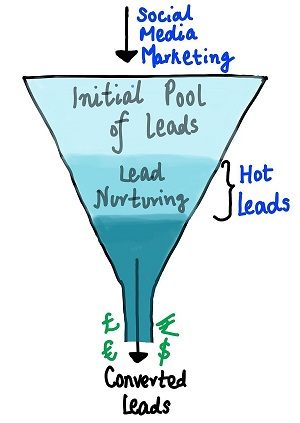                      

__Our Goals of the Case Study:__

- To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. 

- A **higher score** would mean that the lead is hot, i.e. is most likely to convert whereas a **lower score** would mean that the lead is cold and will mostly not get converted.

- To **adjust to if the company's requirement changes** in the future so you will need to handle these as well.

__The steps are broadly:__

1. Read and understand the data
2. Clean the data
3. Explaratory Data Analysis
4. Prepare the data for Model Building
5. Model Building
6. Model Evaluation
7. Making Predictions on the Test Set

# Step: 1  - Read and understand the data  

### Step 1.1 - Importing necessasary libraries 

In [1]:
# Importing Numpy and Pandas Libraries
import pandas as pd
import numpy as np

#Importing visulaization libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


#Importing stats model

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing sklearn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

#Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Step 1.2 Loading and Inspecting Data

In [2]:
xLeads = pd.read_csv("Leads.csv")
xLeads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- Data is loaded sucessfully 

### Step 1.3  Checking size of the data set

In [3]:
# Checking size of the file
xLeads.shape

(9240, 37)

- There are 9240 observations and 37 features in the dataset.

### Step 1.4 Checking the data types of each columns

In [4]:
#check the information of the variables and check their data types
xLeads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. 
- Also, there are a lot of null values present as well, so we will need to treat them accordingly.

### Step 1.5 Five Points Summary Statistics for Integer and Float features.

In [5]:
# checking five pints summary statistics 
xLeads.describe(include=['float','int']).T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


- There are null values present in the data set
- Converted is Tartget variable, it is have only two values 0 and 1
- For features : TotalVisits , 'Total Time Spent on Website' , 'Page Views Per Visit' , the distribution of the data is not symmetric. Mean is greater than median, So data is skewed to right
- For 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' features, Mean and Median are almost same. So data may distribute normally. 

# Step 2 - Cleaning the data set

### Step 2.1 Standaridzing columns names

In [6]:
col = "Do Not Email"
col = ["_".join(col.lower().split())]
col

['do_not_email']

In [7]:
xLeads.columns = ['_'.join(name.lower().split()) for name in xLeads.columns]
xLeads.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- As we have noted that lead_profile and City features contains some 'Select' values it means these are the missing vales .
- Replacing Select values with nan values


In [8]:
# Raplace Select value with np.nan

xLeads = xLeads.replace("Select",np.nan)
xLeads.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2.2 checking for duplicates

In [9]:
xLeads.duplicated().sum()

0

- There are no duplicates in the data set

### Step 3.3 Checking missing values and Imputing missing values

In [10]:
xLeads.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   3380
how_did_you_hear_about_x_education               7250
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

- Here we found that lots of Missing values are there it should be treated well. checking the columns which column containd more than 40% of Missing Values

In [11]:
# Checking % of missing values and correspinding columns where percentage is greater thatn 45

percent_missing = round(xLeads.isnull().sum()/len(xLeads)*100,2)
missing_value_df = pd.DataFrame({'column_name': xLeads.columns, 'percent_missing': percent_missing})
missing_value_df[missing_value_df.percent_missing > 25]

,column_name,percent_missing
country,country,26.63
specialization,specialization,36.58
how_did_you_hear_about_x_education,how_did_you_hear_about_x_education,78.46
what_is_your_current_occupation,what_is_your_current_occupation,29.11
what_matters_most_to_you_in_choosing_a_course,what_matters_most_to_you_in_choosing_a_course,29.32
tags,tags,36.29
lead_quality,lead_quality,51.59
lead_profile,lead_profile,74.19
city,city,39.71
asymmetrique_activity_index,asymmetrique_activity_index,45.65


In [12]:
cols = xLeads.columns[round((xLeads.isnull().sum()/len(xLeads))*100) >= 40]
cols

Index(['how_did_you_hear_about_x_education', 'lead_quality', 'lead_profile',
       'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score'],
      dtype='object')

- It is good to drop the above columns as the missing values contains more thaan 40%. However lead_quality,City, asymmetrique_activity_index, asymmetrique_profile_index having missing values % greater than 40, we will retain those featurtes for further  study . Will dro the remaining features 

In [13]:
cols =['how_did_you_hear_about_x_education','lead_profile','asymmetrique_activity_score', 'asymmetrique_profile_score','city']
xLeads_new = xLeads.drop(cols,axis=1)
xLeads_new.shape

(9240, 32)

- Now the totoal number of columns 33. Original data set is having 37 columns. after droping the columns which contains 

In [14]:
#checking for further missing values in the data set
xLeads_new.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   3380
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums          

 - Imputing missing values for below features with respecting either Medain or Mode
 - - lead_source
 - - total_time_spent_on_website
 - - page_views_per_visit                              
 - - last_activity                                     
 - - country                                          
 - - specialization                                   
 - - what_is_your_current_occupation                  
 - - what_matters_most_to_you_in_choosing_a_course    
 - - tags - We will drop this feature as it is dervives by the sales team

In [15]:
# Column "lead_quality" has 52% NA values. We'll classify them as "not_sure".
xLeads_new.lead_quality.fillna("not_sure", inplace=True)
print(xLeads_new.lead_quality.value_counts())

not_sure             4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: lead_quality, dtype: int64


In [16]:
# Asymmetrique Index

# Removing initial numbers from category naming
xLeads_new['asymmetrique_profile_index'] = xLeads_new['asymmetrique_profile_index'].str[3:]
xLeads_new['asymmetrique_activity_index'] = xLeads_new['asymmetrique_activity_index'].str[3:]

# Replacing nan with most commonly occuring category
xLeads_new['asymmetrique_activity_index'].fillna(xLeads_new['asymmetrique_activity_index'].mode().values[0], inplace=True)
xLeads_new['asymmetrique_profile_index'].fillna(xLeads_new['asymmetrique_profile_index'].mode().values[0], inplace=True)

In [17]:
# Finding the Labels contains in the Country Variable
xLeads_new['country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
# imputing  "India" as its common occurance in Country Column
xLeads_new['country']=xLeads_new['country'].replace(np.nan,'India')

In [19]:
# Finding the Labels contains in the lead_source Variable
xLeads_new["lead_source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: lead_source, dtype: int64

- Google is the most common occurence value. Hence imputing with Google.

In [20]:
xLeads_new["lead_source"] = xLeads_new["lead_source"].replace(np.nan,"Google")

In [21]:
# here we have found that google and Google is same just a typo hence we replaced it google to Google.
xLeads_new['lead_source']=xLeads_new['lead_source'].replace('google','Google')

In [22]:
xLeads_new["lead_source"].isnull().sum()

0

In [23]:
# Finding the median value for total_time_spent_on_website Variable
median = xLeads_new["total_time_spent_on_website"].median()
median

248.0

- As total_time_spent_on_website is a numeric in nature, so will raplace nan values with medain

In [24]:
# Imputing with medain value
xLeads_new["total_time_spent_on_website"] = xLeads_new["total_time_spent_on_website"].replace(np.nan,median)
xLeads_new["total_time_spent_on_website"].isnull().sum()

0

In [25]:
#Finding the medain value for page_views_per_visit as it is float data type
medain = xLeads_new["page_views_per_visit"].median()
medain

2.0

In [26]:
#Imputing the nan values with medain for feature - page_views_per_visit
xLeads_new["page_views_per_visit"] = xLeads_new["page_views_per_visit"].replace(np.nan,median)
xLeads_new["page_views_per_visit"].isnull().sum()

0

In [27]:
#Imputing the nan values with medain for feature - page_views_per_visit
xLeads_new["totalvisits"] = xLeads_new["totalvisits"].replace(np.nan,xLeads_new["totalvisits"].median())
xLeads_new["totalvisits"].isnull().sum()

0

In [28]:
# Finding the Labels contains for last_activity Variable
xLeads_new["last_activity"].value_counts()


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: last_activity, dtype: int64

- Email Opened is the most common occurence value. Hence imputing with Google.

In [29]:
mode = xLeads_new["last_activity"].mode()[0]
xLeads_new["last_activity"] = xLeads_new["last_activity"].replace(np.nan,mode)
xLeads_new["last_activity"].isnull().sum()

0

- Replacing country, specialization, what_is_your_current_occupation and what_matters_most_to_you_in_choosing_a_course with there mode

In [30]:
xLeads_new["specialization"] = xLeads_new["specialization"].replace(np.nan,xLeads_new["specialization"].mode()[0])

In [31]:
xLeads_new["what_is_your_current_occupation"] = xLeads_new["what_is_your_current_occupation"].replace(np.nan,xLeads_new["what_is_your_current_occupation"].mode()[0])

In [32]:
xLeads_new["what_matters_most_to_you_in_choosing_a_course"] = xLeads_new["what_matters_most_to_you_in_choosing_a_course"].replace(np.nan,xLeads_new["what_matters_most_to_you_in_choosing_a_course"].mode()[0])

In [33]:
xLeads_new.drop("tags",axis=1,inplace=True)

In [34]:
## Checking missiing values
xLeads_new.isna().sum()

prospect_id                                      0
lead_number                                      0
lead_origin                                      0
lead_source                                      0
do_not_email                                     0
do_not_call                                      0
converted                                        0
totalvisits                                      0
total_time_spent_on_website                      0
page_views_per_visit                             0
last_activity                                    0
country                                          0
specialization                                   0
what_is_your_current_occupation                  0
what_matters_most_to_you_in_choosing_a_course    0
search                                           0
magazine                                         0
newspaper_article                                0
x_education_forums                               0
newspaper                      

 - No Null Values are remaining in the dataset

In [35]:
#Checking shape
xLeads_new.shape

(9240, 31)

In [36]:
xLeads_new.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,through_recommendations,receive_more_updates_about_our_courses,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,asymmetrique_activity_index,asymmetrique_profile_index,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Low in Relevance,No,No,Medium,Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,not_sure,No,No,Medium,Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Might be,No,No,Medium,High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Not Sure,No,No,Medium,High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Might be,No,No,Medium,High,No,No,Modified


In [37]:
# Making Lead_Number as index
xLeads_new = xLeads_new.set_index("lead_number")


In [38]:
xLeads_new.drop("prospect_id",axis=1,inplace=True)
xLeads_new.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,...,through_recommendations,receive_more_updates_about_our_courses,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,asymmetrique_activity_index,asymmetrique_profile_index,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
lead_number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,Low in Relevance,No,No,Medium,Medium,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,not_sure,No,No,Medium,Medium,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Might be,No,No,Medium,High,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Not Sure,No,No,Medium,High,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Might be,No,No,Medium,High,No,No,Modified


In [39]:
#Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_obj=list(xLeads_new.loc[:, xLeads_new.dtypes == np.object].columns)
col_num=list(xLeads_new.loc[:, xLeads_new.dtypes == np.int64].columns)
col_num+=(list(xLeads_new.loc[:, xLeads_new.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'last_activity', 'country', 'specialization', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 'lead_quality', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity'] 
 
 columns with number dtype 
 ['converted', 'total_time_spent_on_website', 'totalvisits', 'page_views_per_visit']


In [40]:
print('columns with object dtype: {} \ncolumns with number dtype: {}'.format(len(col_obj),len(col_num)))

columns with object dtype: 25 
columns with number dtype: 4


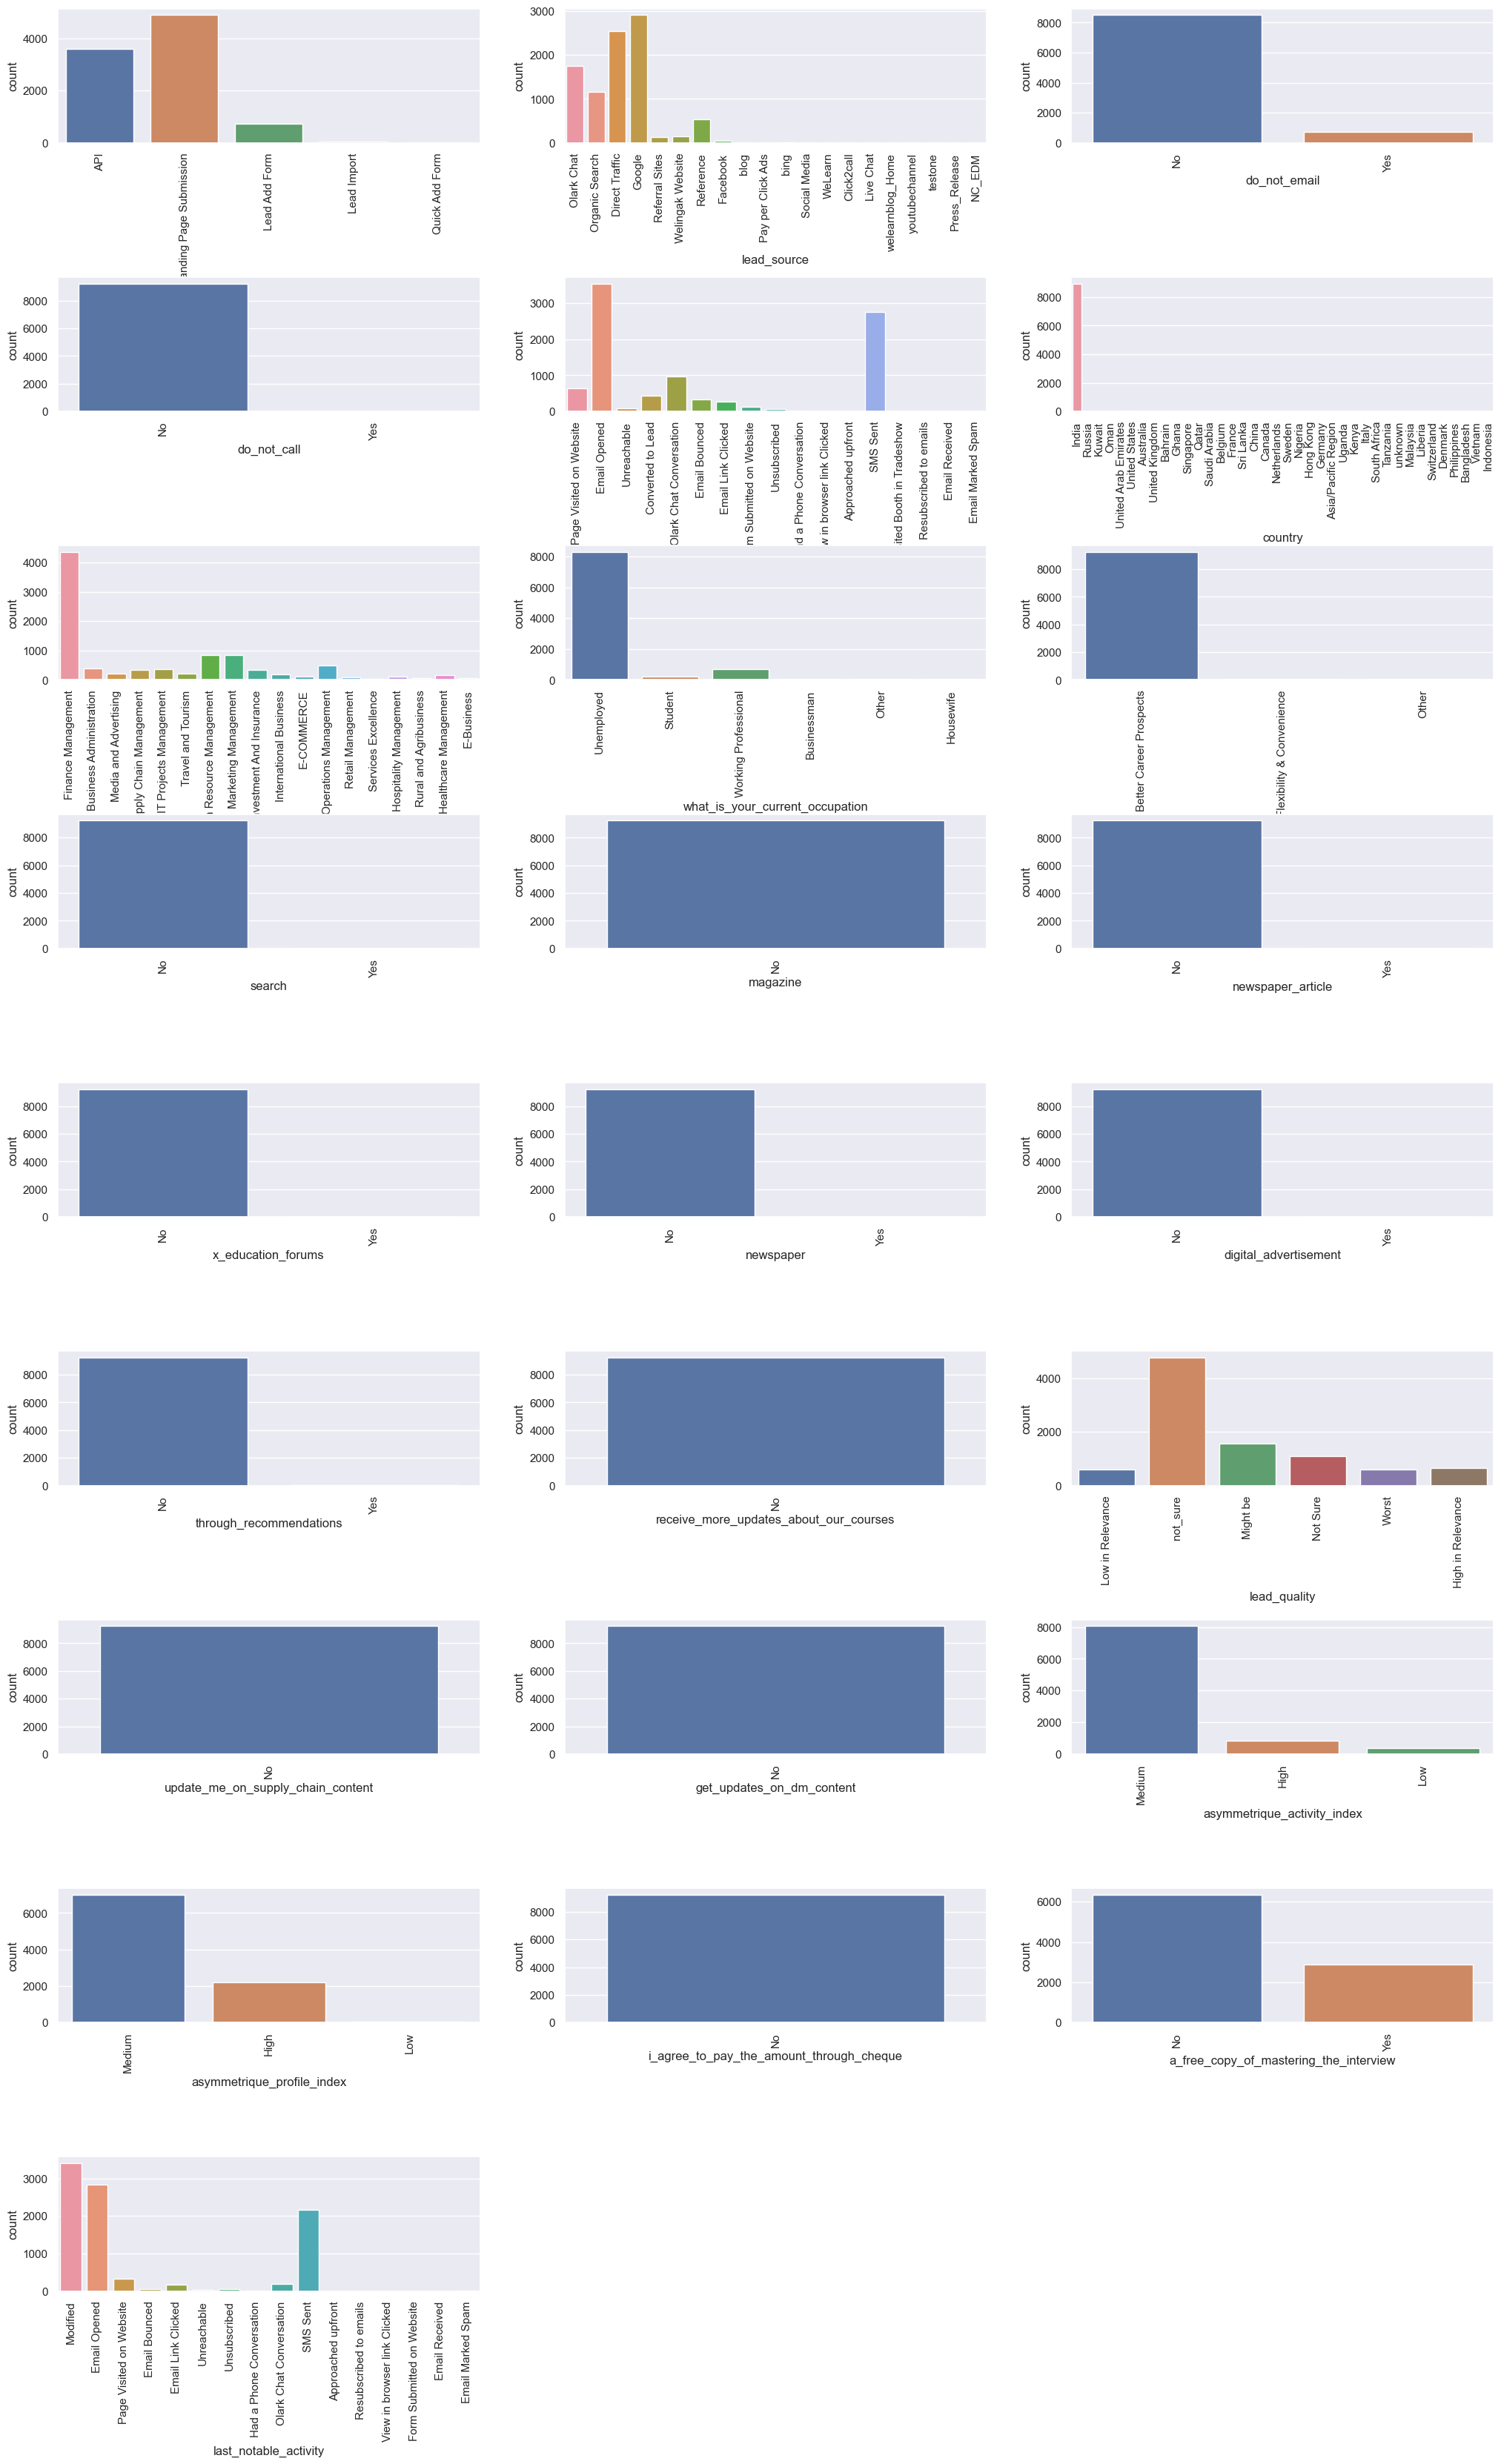

In [41]:
# plotting countplot for object dtype and histogram for number to get data distribution
plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(9,3, i[0]+1)
    sns.countplot(i[1],data=xLeads_new) 
    plt.xticks(rotation=90)
plt.show()

Insights
- We can see that there are many colums which are highly skewed or only one values i.e 'Magazine'... we Can remove these colums as this will not help in model building.

- There are cloumns which have many categories(>5), here we can impute new value 'Other' for which are occured less.

Removing Highly Skewed variables and if Column contains Single Label

In [42]:
# Taking care of highly skewed columns  and one value only
xLeads_new = xLeads_new.drop(['what_is_your_current_occupation','do_not_call','do_not_email','country','search',\
                      'x_education_forums','newspaper','newspaper_article','through_recommendations','digital_advertisement','what_matters_most_to_you_in_choosing_a_course'],1)

In [43]:
xLeads_new.shape

(9240, 18)

In [44]:
# Droping those variables which contains two labels but one is very High and another is very less number of labels.
xLeads_new=xLeads_new.drop(['magazine','receive_more_updates_about_our_courses','update_me_on_supply_chain_content',\
                      'get_updates_on_dm_content','i_agree_to_pay_the_amount_through_cheque', ],1)
col_obj=xLeads_new.loc[:, xLeads_new.dtypes == np.object].columns

In [45]:
col_obj=xLeads_new.loc[:, xLeads_new.dtypes == np.object].columns

In [46]:
col_obj

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'lead_quality', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'a_free_copy_of_mastering_the_interview',
       'last_notable_activity'],
      dtype='object')

In [47]:
xLeads_new.shape

(9240, 13)

# Maintaing the labels which Column contains lots of labels

In [48]:
xLeads_new['lead_source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: lead_source, dtype: int64

In [49]:
# changing categories which are occured less than 1000
col_dict_ls=dict(xLeads_new['lead_source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        xLeads_new['lead_source']=xLeads_new['lead_source'].replace(i,'Other')

In [50]:
xLeads_new['lead_source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Other              879
Name: lead_source, dtype: int64

In [51]:
xLeads_new['last_activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: last_activity, dtype: int64

In [52]:
# Changing categories which are occured less than 300
col_dict_la=dict(xLeads_new['last_activity'].value_counts()<300)
# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        xLeads_new['last_activity']=xLeads_new['last_activity'].replace(i,'Other')

In [53]:
xLeads_new['last_activity'].value_counts()

Email Opened               3540
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Other                       588
Converted to Lead           428
Email Bounced               326
Name: last_activity, dtype: int64

In [54]:
xLeads_new['last_notable_activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: last_notable_activity, dtype: int64

In [55]:
# Changing categories which are occured less than 500
col_dict_lna=dict(xLeads_new['last_notable_activity'].value_counts()<500)
# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
        xLeads_new['last_notable_activity']=xLeads_new['last_notable_activity'].replace(i,'Other')

In [56]:
xLeads_new['last_notable_activity'].value_counts()

Modified        3407
Email Opened    2827
SMS Sent        2172
Other            834
Name: last_notable_activity, dtype: int64

In [57]:
xLeads_new['specialization'].value_counts()

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [58]:
# Changing categories which are occured less than 350
col_dict_spec=dict(xLeads_new['specialization'].value_counts()<350)
# labels which are occured less like E-Business,Retail Management we can impute to 'Other'

for i in col_dict_spec.keys():
    if col_dict_spec[i]==True:
        xLeads_new['specialization']=xLeads_new['specialization'].replace(i,'Other')

In [59]:
xLeads_new['specialization'].value_counts()

Finance Management           4356
Other                        1926
Human Resource Management     848
Marketing Management          838
Operations Management         503
Business Administration       403
IT Projects Management        366
Name: specialization, dtype: int64

# Step 3 Exploratory Data Analysis

### Step 3.1 Univariate Analysis - converted feature

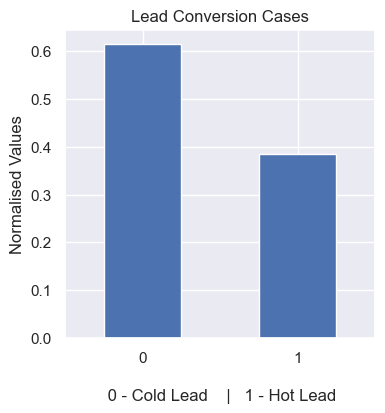

In [60]:
plt.figure(figsize=(4,4))
xLeads_new.converted.value_counts(normalize=True).plot.bar(color="b")
plt.title("Lead Conversion Cases")
plt.xlabel("\n 0 - Cold Lead    |   1 - Hot Lead")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

- Based on the above data , 48% of the lead data is converted and 62% of the data is not converted.  Now we have to propose recommendations for data to be converted.

In [61]:
#checking exact Coverted 0 to Target 1 ratio
xLeads_new[xLeads_new.converted==0].shape[0]/xLeads_new[xLeads_new.converted==1].shape[0]

1.594776748104465

- Inference : 1 in every ~2 lead numbers has difficulty in converted. 

### Step 3.2 Univariate analysis of all Categorical features

In [62]:
# crating cols which contains only Categorical variable
cols=xLeads_new.loc[:, xLeads_new.dtypes == np.object].columns
cols

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'lead_quality', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'a_free_copy_of_mastering_the_interview',
       'last_notable_activity'],
      dtype='object')

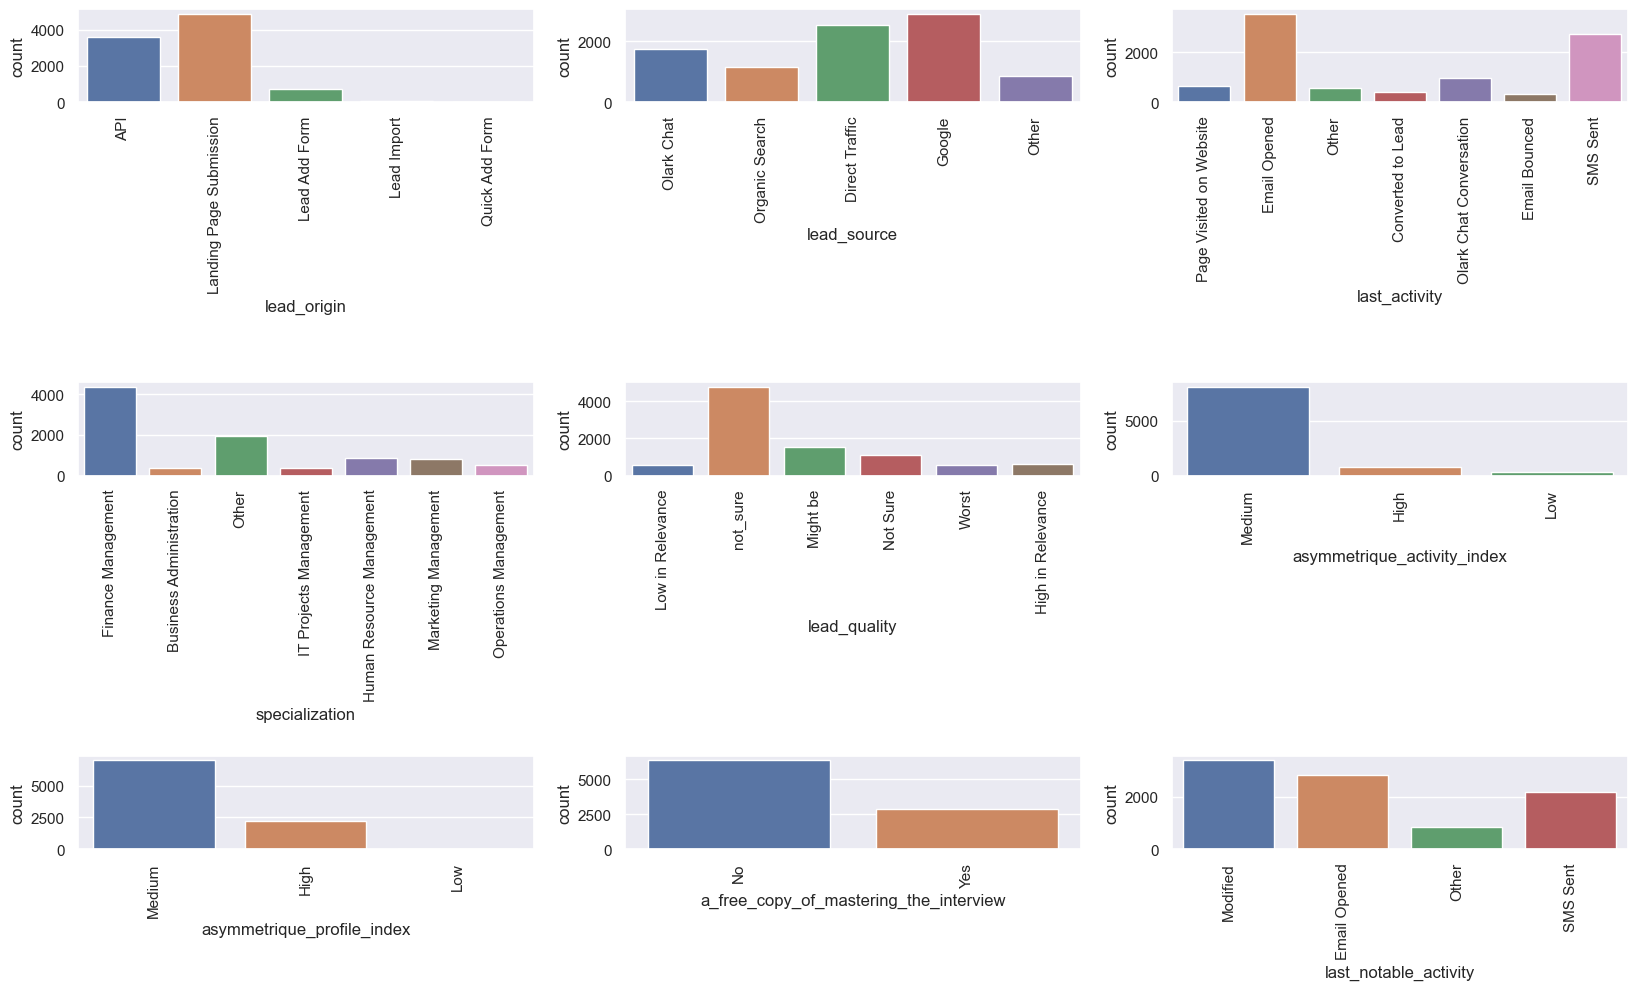

In [63]:
plt.figure(figsize=(20,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=3.0)
for i in enumerate(col_obj):
    plt.subplot(9,3, i[0]+1)
    sns.countplot(i[1],data=xLeads_new)
    plt.xticks(rotation=90)

plt.show()

Insights :-
- In Lead Origin API and 'Landing Page submission" are the two main origins for Leads
- In Lead Source Direct Traffic and Google are the two main source for Leads
- Most of the response for do_not_email and do_not_call is "No". Might these lead number having low chances to converted. Also need to do check on whether these features are important or not. 
- The Number of values is High in Email Opened and SMS Sent in Last Activity
- Most of the people chooses Finance Management Specialization rather than other Specialization
- Most of the unemployed people ae prefereed for this specialization. This needs to be checked further.
- Most of the people are choosing the specilization for better carrer proposition. 
- The IT Project management have very lees so that most of the People not prefered this Specialization

### Step 3.3 Univariate Analsysis for Continuos features

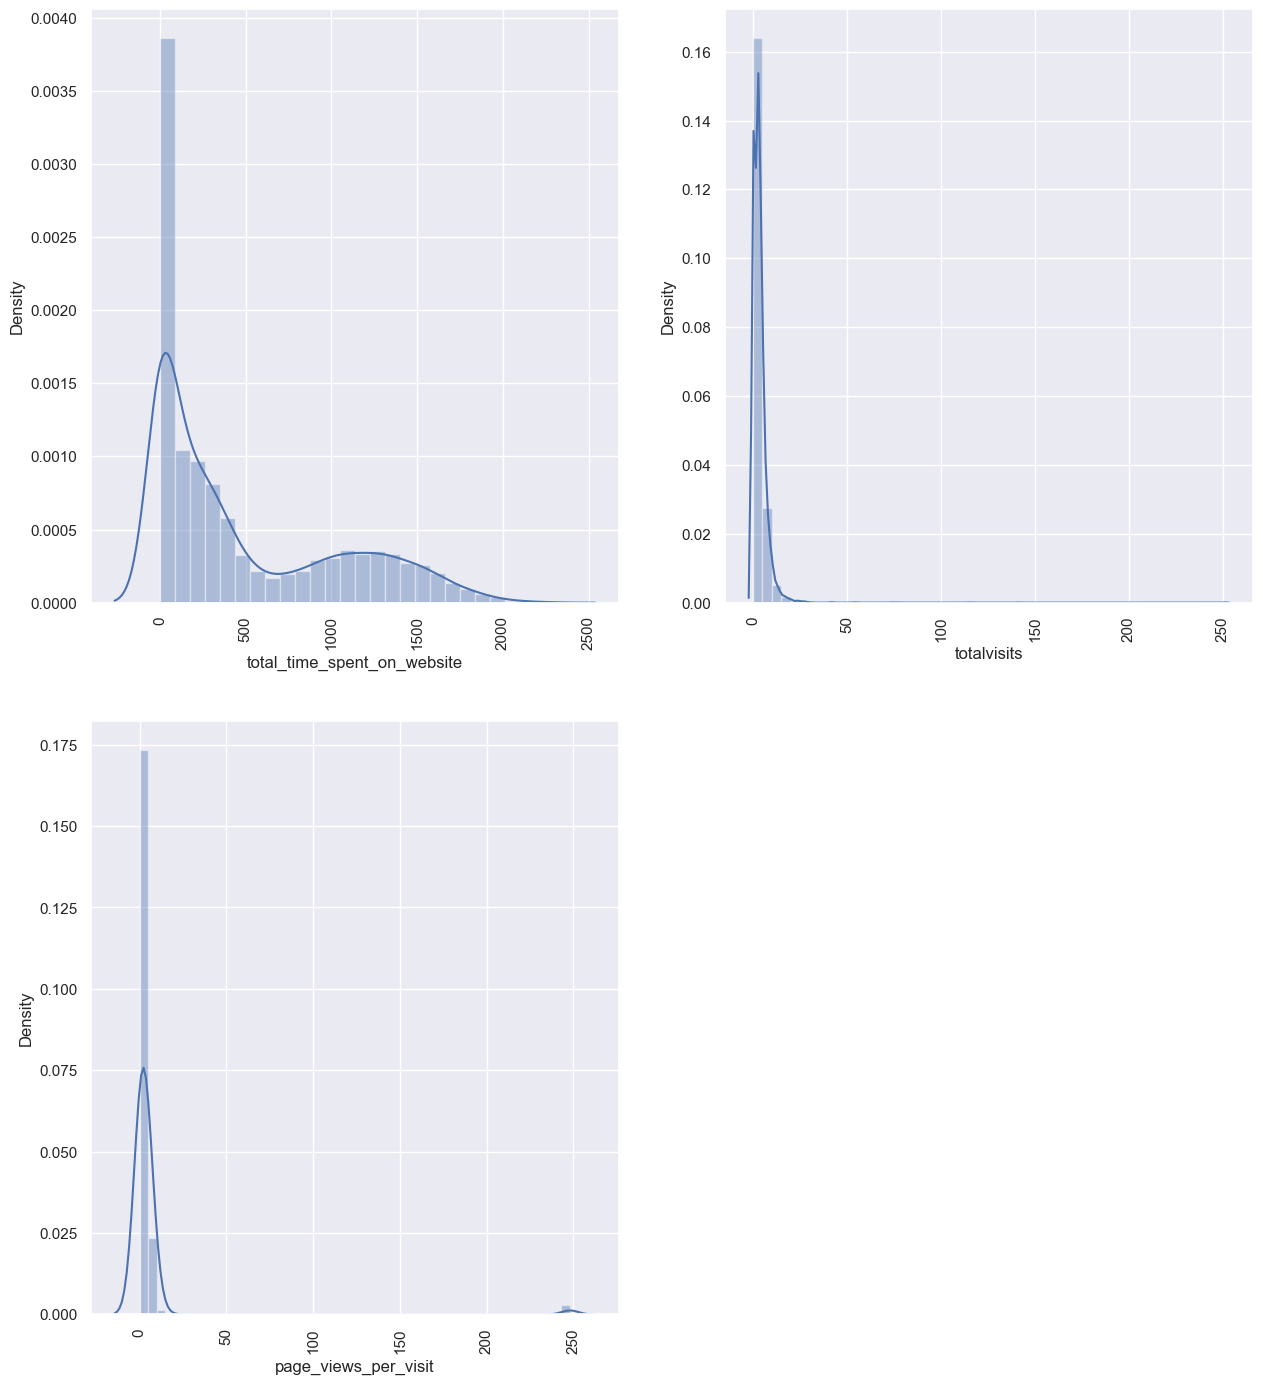

In [64]:
col_num.remove('converted')

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(xLeads_new[i[1]])
    
    plt.xticks(rotation=90)
    
plt.show()

Insights :-
- None of the Continueous Variables are in Normal distribution and data is skewed right.
- Presence of Outliers in Total Visits and Page Views Per Visit
- In total visits more values is between 0-50 and page views per visits 0-20

### Step 3.4 Checking outliers

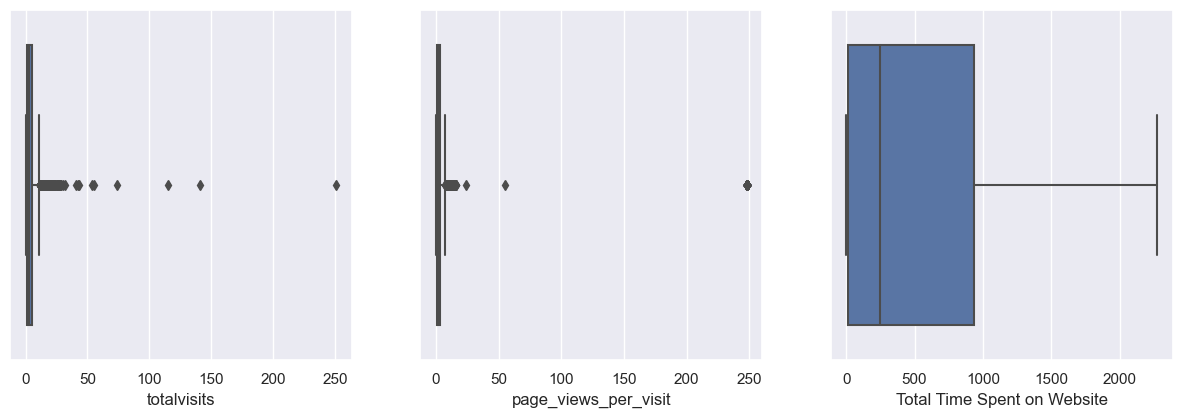

In [65]:
# Finding the outliers
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(xLeads_new['totalvisits'])
plt.subplot(2,3,2)
sns.boxplot(xLeads_new['page_views_per_visit'])
plt.subplot(2,3,3)
sns.boxplot(xLeads_new['total_time_spent_on_website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

 - Outliers are Present in both the Variables TotalVisits and Page Views Per Visit it should be treated and the value spreaded above median highly in Total Time Spent on Website. As we are using standard scalar for normilizing the data. Outlier treatment is not required.

### Step 3.4 Bivaraite Analysis - Categorical features

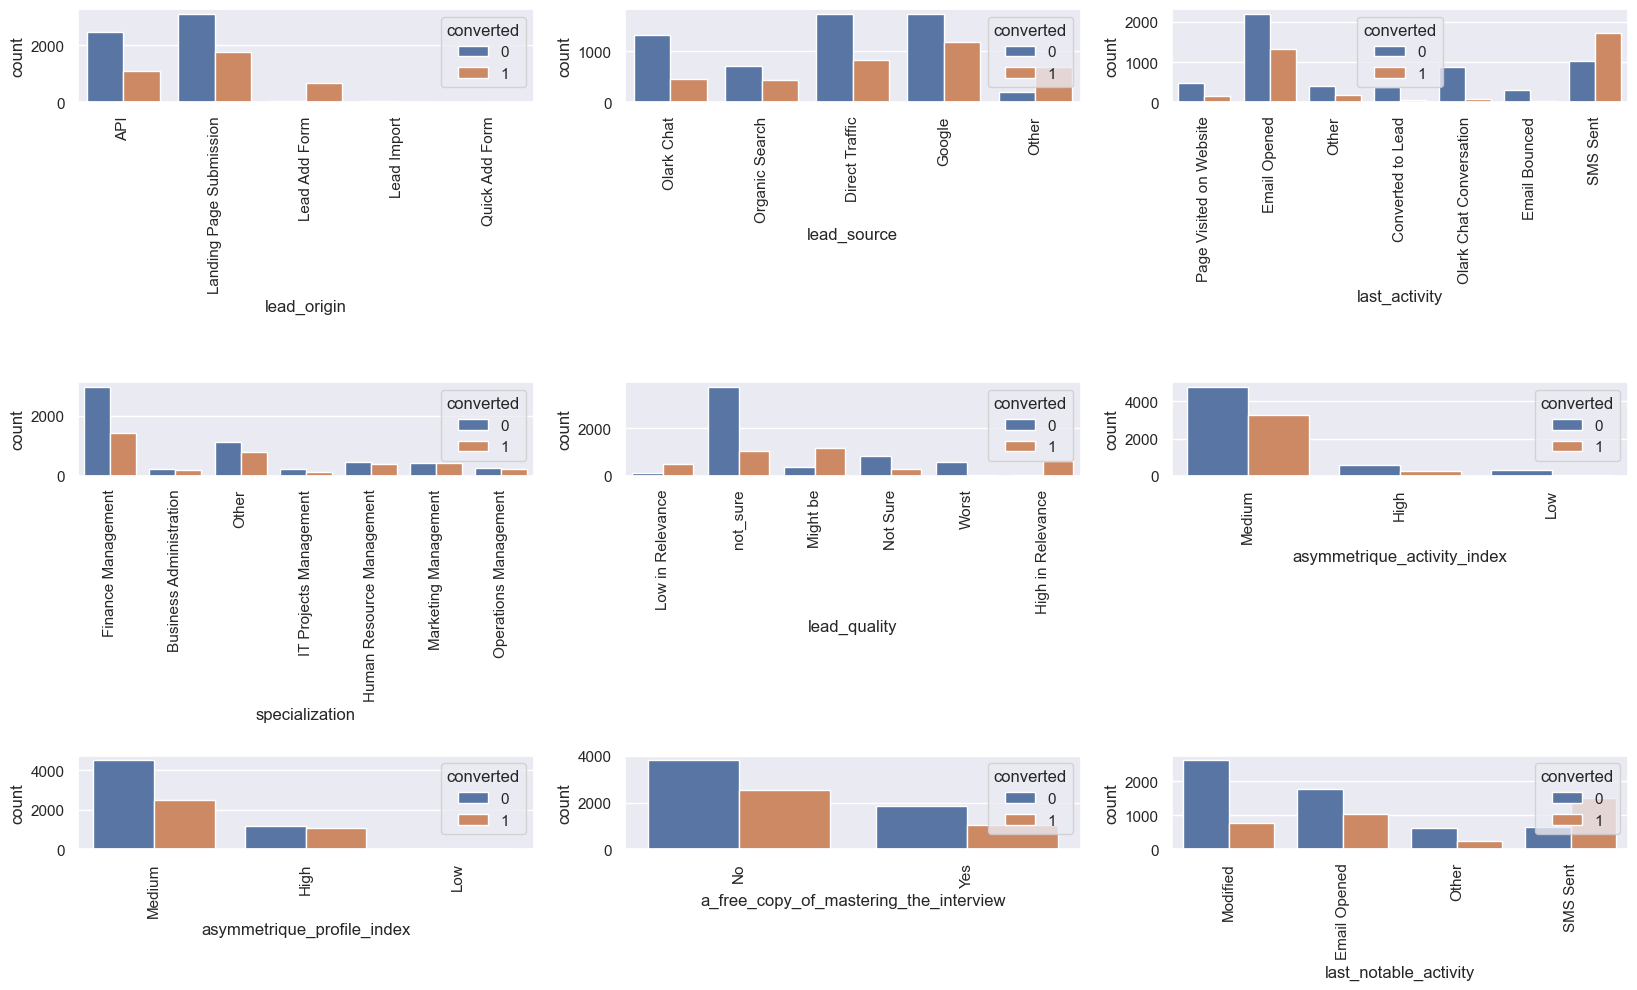

In [66]:
# Bivariate analysis with the target varaiable converterd

plt.figure(figsize=(20,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=3.0)
for i in enumerate(col_obj):
    plt.subplot(9,3, i[0]+1)
    sns.countplot(i[1],hue= xLeads_new.converted,data=xLeads_new)
    plt.xticks(rotation=90)

plt.show()

Insights :-
- In Lead Source The number of Hot leads is higher in Direct Traffic and Google less in Other Category
- In Last Activity the number of Hot leads is higher in SMS and in EMAIL cold leads is higher than hot leads.
- In Last Notable Activity it's mostly same as Last Activity.
- In Specialization the most of the leads are comes from Finance management but here Hot leads are lesseer than Cold leads.

### Step 3.5 - Bivariate analysis of Continuous features

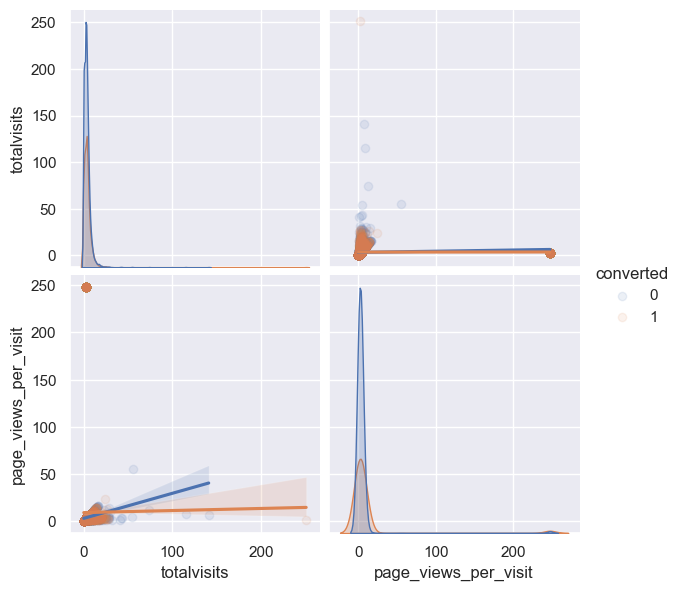

In [67]:
sns.pairplot(data=xLeads_new, vars=col_num[1:4], hue='converted', kind='reg', height=3,
             plot_kws={'scatter_kws': {'alpha': 0.1}})
plt.show()

- From the above, can't intefere anything. May be data trasformation will be requrie to get the more clairity

# Step 4 - Prepare Data for modeling

In [68]:
#Inspecting first five records
xLeads_new.head()

,lead_origin,lead_source,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,specialization,lead_quality,asymmetrique_activity_index,asymmetrique_profile_index,a_free_copy_of_mastering_the_interview,last_notable_activity
lead_number,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Low in Relevance,Medium,Medium,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,not_sure,Medium,Medium,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Might be,Medium,High,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Not Sure,Medium,High,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Might be,Medium,High,No,Modified


In [69]:
xLeads_new.columns

Index(['lead_origin', 'lead_source', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'specialization', 'lead_quality', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'a_free_copy_of_mastering_the_interview',
       'last_notable_activity'],
      dtype='object')

In [70]:
# mapping of columns No - 0 and Yes - 1

xLeads_new["a_free_copy_of_mastering_the_interview"] = xLeads_new["a_free_copy_of_mastering_the_interview"].apply(lambda x:1 if x == 'Yes' else 0)

In [71]:
xLeads_new.head()

,lead_origin,lead_source,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,specialization,lead_quality,asymmetrique_activity_index,asymmetrique_profile_index,a_free_copy_of_mastering_the_interview,last_notable_activity
lead_number,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Low in Relevance,Medium,Medium,0,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,not_sure,Medium,Medium,0,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Might be,Medium,High,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Not Sure,Medium,High,0,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Might be,Medium,High,0,Modified


In [72]:
#inspecting data types
xLeads_new.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_origin                             9240 non-null   object 
 1   lead_source                             9240 non-null   object 
 2   converted                               9240 non-null   int64  
 3   totalvisits                             9240 non-null   float64
 4   total_time_spent_on_website             9240 non-null   int64  
 5   page_views_per_visit                    9240 non-null   float64
 6   last_activity                           9240 non-null   object 
 7   specialization                          9240 non-null   object 
 8   lead_quality                            9240 non-null   object 
 9   asymmetrique_activity_index             9240 non-null   object 
 10  asymmetrique_profile_index              9240 non-null

### Creating dummy varaible for all Categorical features

In [73]:
dummies = pd.get_dummies(xLeads_new.select_dtypes(include=['object']),drop_first=True)
dummies.head()

,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other,last_activity_Email Bounced,last_activity_Email Opened,...,lead_quality_Not Sure,lead_quality_Worst,lead_quality_not_sure,asymmetrique_activity_index_Low,asymmetrique_activity_index_Medium,asymmetrique_profile_index_Low,asymmetrique_profile_index_Medium,last_notable_activity_Modified,last_notable_activity_Other,last_notable_activity_SMS Sent
lead_number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
660728,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
660727,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
660719,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
660681,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [74]:
# getting the cleaned df
xLeads_clean = xLeads_new.drop(xLeads_new.select_dtypes(include=['object']).columns, axis=1)
xLeads_clean = pd.concat([xLeads_clean, dummies], axis=1)

xLeads_clean.head()

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Google,...,lead_quality_Not Sure,lead_quality_Worst,lead_quality_not_sure,asymmetrique_activity_index_Low,asymmetrique_activity_index_Medium,asymmetrique_profile_index_Low,asymmetrique_profile_index_Medium,last_notable_activity_Modified,last_notable_activity_Other,last_notable_activity_SMS Sent
lead_number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
660727,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
660719,0,1.0,305,1.0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
660681,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [75]:
xLeads_clean.shape

(9240, 37)

# Splitting data into training and testing sets 

In [76]:
X = xLeads_clean.drop("converted",axis=1)
y = xLeads_clean["converted"]

In [77]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

In [78]:
print("X Train Size:",X_train.shape)
print("X Test Size:", X_test.shape)
print("y Train Size:",y_train.shape)
print("y Test Size:",y_test.shape)

X Train Size: (6468, 36)
X Test Size: (2772, 36)
y Train Size: (6468,)
y Test Size: (2772,)


In [79]:
X_train.columns

Index(['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit',
       'a_free_copy_of_mastering_the_interview',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_origin_Quick Add Form',
       'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Other',
       'last_activity_Email Bounced', 'last_activity_Email Opened',
       'last_activity_Olark Chat Conversation', 'last_activity_Other',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Operations Management', 'specialization_Other',
       'lead_quality_Low in Relevance', 'lead_quality_Might be',
       'lead_quality_Not Sure', 'lead_quality_Worst', 'lead_quality_not_sure',
     

# Scaling the features

In [80]:
scaler=StandardScaler()
X_train[['total_time_spent_on_website','page_views_per_visit','totalvisits']]=\
scaler.fit_transform(X_train[['total_time_spent_on_website','page_views_per_visit','totalvisits']])

In [81]:
X_train.head()

,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Google,lead_source_Olark Chat,...,lead_quality_Not Sure,lead_quality_Worst,lead_quality_not_sure,asymmetrique_activity_index_Low,asymmetrique_activity_index_Medium,asymmetrique_profile_index_Low,asymmetrique_profile_index_Medium,last_notable_activity_Modified,last_notable_activity_Other,last_notable_activity_SMS Sent
lead_number,,,,,,,,,,,,,,,,,,,,,
609431,1.266623,-0.225161,-0.113780,1,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
631817,-0.662572,-0.886868,-0.200419,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,1,0,0
596164,-0.276733,-0.874002,-0.131108,1,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
646570,0.109106,-0.747174,-0.131108,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
643974,-0.276733,-0.710413,-0.131108,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0


# Correrations

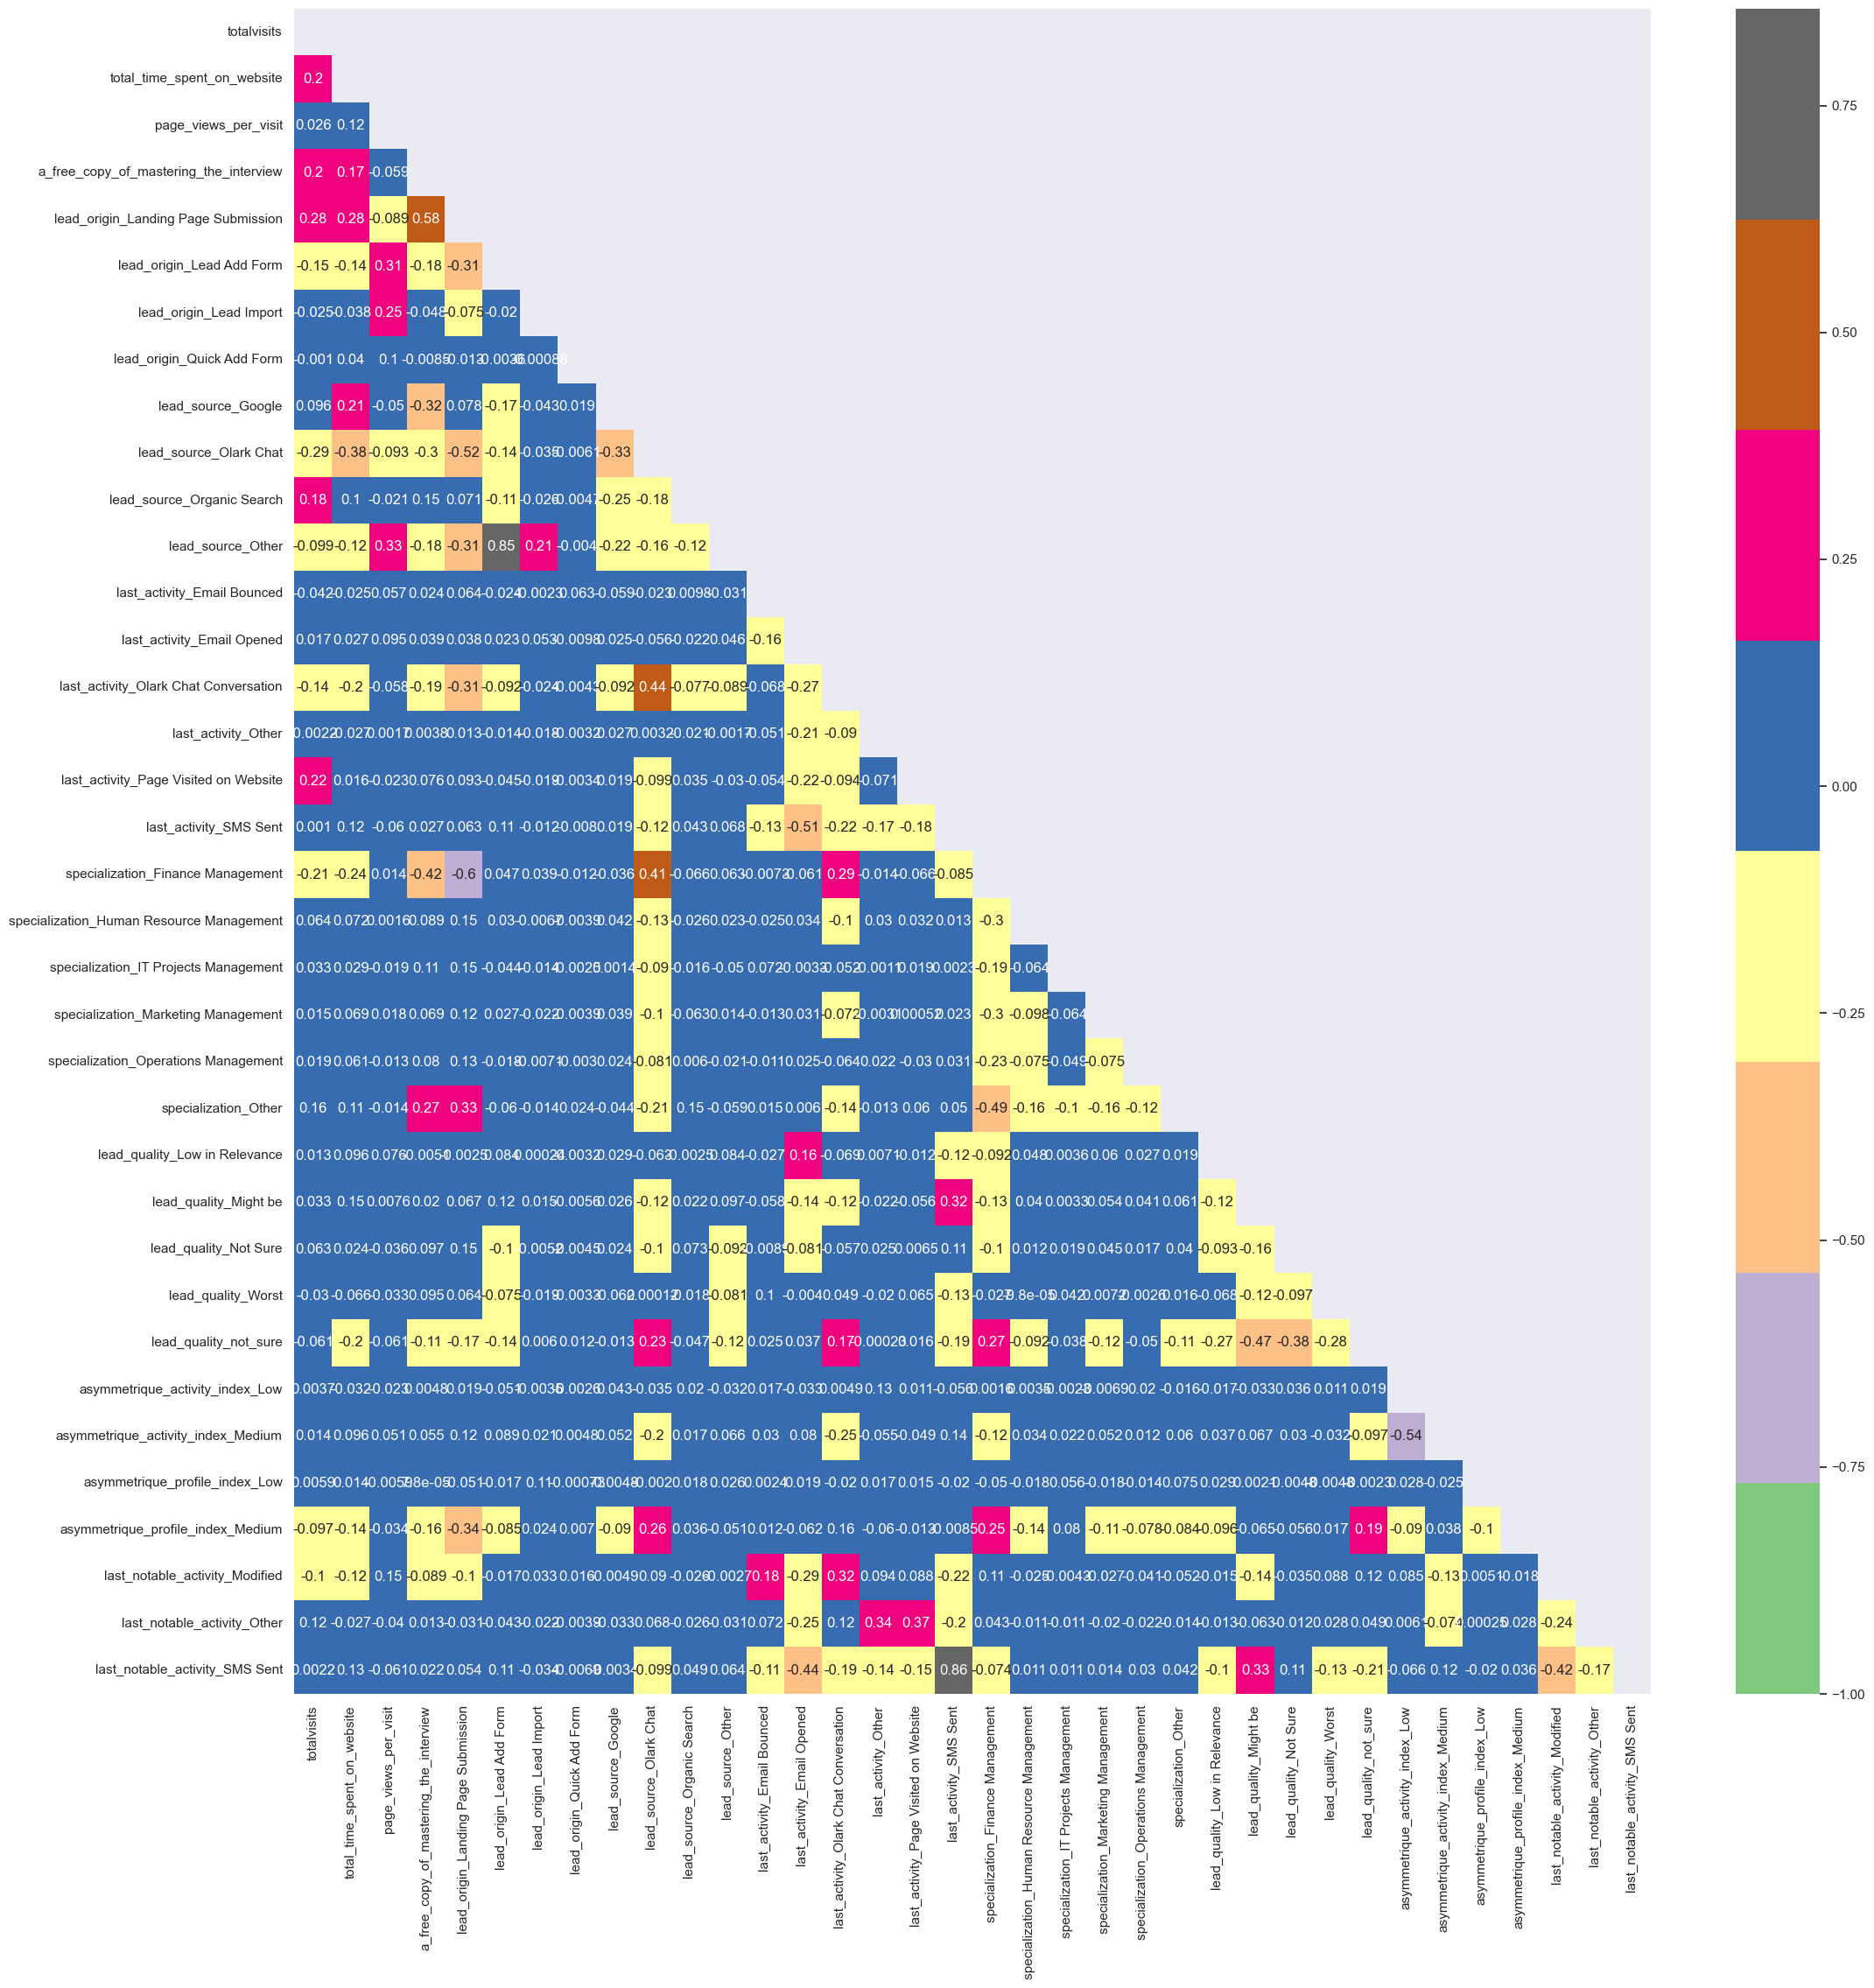

In [82]:
# Finding the Correlation using HeatMap
plt.figure(figsize = (25,25))
mask = np.zeros(X_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(X_train.corr(), annot = True, vmin=-1,cmap='Accent',mask=mask)
plt.show()

In [83]:
# columns pairs in order of highest absolute correlation
X_train.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

totalvisits                          totalvisits                               1.000000
last_notable_activity_SMS Sent       last_activity_SMS Sent                    0.856657
lead_origin_Lead Add Form            lead_source_Other                         0.849913
lead_origin_Landing Page Submission  specialization_Finance Management         0.599689
                                     a_free_copy_of_mastering_the_interview    0.577658
asymmetrique_activity_index_Low      asymmetrique_activity_index_Medium        0.536476
lead_source_Olark Chat               lead_origin_Landing Page Submission       0.521373
last_activity_Email Opened           last_activity_SMS Sent                    0.508513
specialization_Finance Management    specialization_Other                      0.487635
lead_quality_not_sure                lead_quality_Might be                     0.468269
lead_source_Olark Chat               last_activity_Olark Chat Conversation     0.437846
last_activity_Email Opened      

- We can see some columns are highly correlated
- we will let RFE to decide to drop columns or not

# Step 5 - Model Building

# Step 5.1 Model Selection using RFE

### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

### Running RFE with corss validation to find the optimal score.

In [84]:
def optimal_features(min, max):
    
    opt = list()
    for features in range(min, max):
        log_reg = LogisticRegression(C=2, random_state=42)
        rfe = RFE(log_reg, n_features_to_select = features)
        rfe.fit(X_train, y_train)
        cols = X_train.columns[rfe.support_]

        # Cross Validation
        scores = cross_validate(log_reg, X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
        opt.append((features, scores['test_accuracy'].mean()))
        
    opt = np.array(opt) 
    return opt, opt[opt[:, 1].argmax()]
    

feat_array, opt_features = optimal_features(10, 50)
opt_features

array([20.        ,  0.85157661])

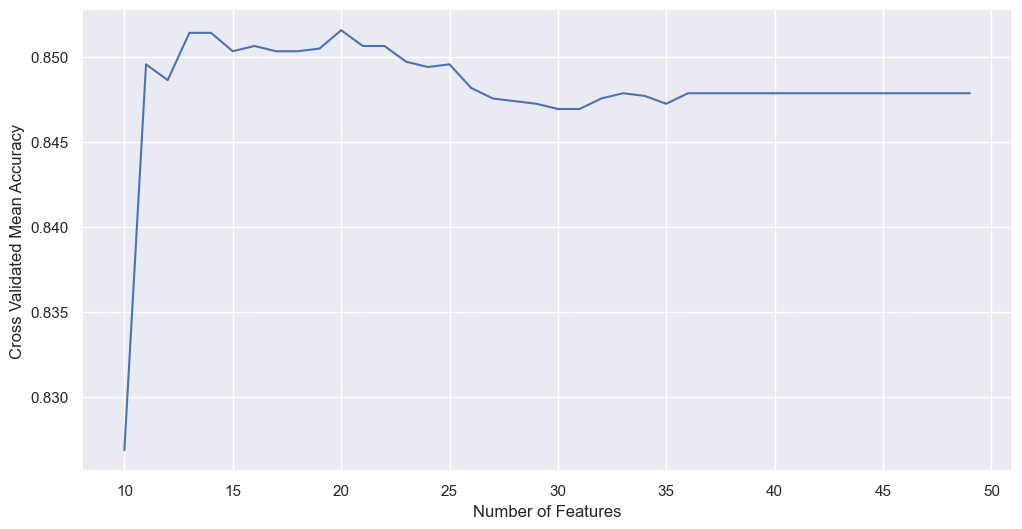

Optimal number of features to use is 20.0 which gives 0.8515766145372 accuracy.


In [85]:
# Here we'll plot how accuracy changes with number of features considered.

plt.figure(figsize=(12, 6))
plt.plot(feat_array[:, 0], feat_array[:, 1])
plt.xlabel("Number of Features")
plt.ylabel("Cross Validated Mean Accuracy")
plt.show()

print(f"Optimal number of features to use is {opt_features[0]} which gives {opt_features[1]} accuracy.")

In [86]:
# RFE
log_reg = LogisticRegression(C=2, random_state=42)
rfe = RFE(log_reg, n_features_to_select = int(opt_features[0]))
rfe.fit(X_train, y_train)
cols = X_train.columns[rfe.support_]
print(f"The columns we'll be using are:\n\n{cols}")

The columns we'll be using are:

Index(['total_time_spent_on_website', 'lead_origin_Landing Page Submission',
       'lead_origin_Lead Add Form', 'lead_origin_Quick Add Form',
       'lead_source_Olark Chat', 'last_activity_Email Bounced',
       'last_activity_Email Opened', 'last_activity_Olark Chat Conversation',
       'last_activity_Other', 'last_activity_SMS Sent',
       'lead_quality_Low in Relevance', 'lead_quality_Might be',
       'lead_quality_Not Sure', 'lead_quality_Worst', 'lead_quality_not_sure',
       'asymmetrique_activity_index_Low', 'asymmetrique_activity_index_Medium',
       'asymmetrique_profile_index_Low', 'last_notable_activity_Other',
       'last_notable_activity_SMS Sent'],
      dtype='object')


In [87]:
# Checking the features not slected by the Model- Features eliminated by the RFE
X_train.columns[~rfe.support_]

Index(['totalvisits', 'page_views_per_visit',
       'a_free_copy_of_mastering_the_interview', 'lead_origin_Lead Import',
       'lead_source_Google', 'lead_source_Organic Search', 'lead_source_Other',
       'last_activity_Page Visited on Website',
       'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Operations Management', 'specialization_Other',
       'asymmetrique_profile_index_Medium', 'last_notable_activity_Modified'],
      dtype='object')

# Step 5.1 Building a Logistic Regression using statsmodel, for the detailed statistics

### Modle 1

In [88]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2231.8
Date:                Sun, 19 Mar 2023   Deviance:                       4463.6
Time:                        20:33:59   Pearson chi2:                 6.96e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4723
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.2695      0.314      7.238      0.000       1.655       2.884
total_time_spent_on_website               1.0602      0.044     24.181      0.000       0.974       1.146
lead_origin_Landing Page Submission      -0.3997      0.100     -3.996      0.000      -0.596      -0.204
lead_origin_Lead Add Form                 3.0845      0.211     14.631      0.000       2.671       3.498
lead_origin_Quick Add Form               20.5440   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
lead_source_Olark Chat                    0.9752      0.134      7.278      0.000       0.713       1.238
last_activity_Email Bounced              -0.8956      0.349     -2.567      0.010      -1.580      -0.212
last_activity_Email Opened                0.8313      0.153      5.429      0.000       0.531       1.131
last_activity_Olark Chat Conversation    -1.0814      0.225     -4.810      0.000      -1.522      -0.641
last_activity_Other                       0.3894      0.203      1.917      0.055      -0.009       0.787
last_activity_SMS Sent                    1.1375      0.198      5.754      0.000       0.750       1.525
lead_quality_Low in Relevance            -1.0323      0.278     -3.713      0.000      -1.577      -0.487
lead_quality_Might be                    -2.0346      0.253     -8.052      0.000      -2.530      -1.539
lead_quality_Not Sure                    -4.0482      0.261    -15.518      0.000      -4.559      -3.537
lead_quality_Worst                       -6.0354      0.430    -14.046      0.000      -6.878      -5.193
lead_quality_not_sure                    -3.9470      0.244    -16.189      0.000      -4.425      -3.469
asymmetrique_activity_index_Low          -2.4021      0.301     -7.969      0.000      -2.993      -1.811
asymmetrique_activity_index_Medium       -0.7849      0.145     -5.421      0.000      -1.069      -0.501
asymmetrique_profile_index_Low           -0.4546      0.655     -0.694      0.488      -1.738       0.829
last_notable_activity_Other               0.5229      0.172      3.038      0.002       0.186       0.860
last_notable_activity_SMS Sent            1.1390      0.155      7.353      0.000       0.835       1.443
=========================================================================================================
"""

- lead_origin_Quick Add Form and asymmetrique_profile_index_Low is having high P-Value. Will check the VIF.

In [89]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [90]:
# Calculate the VIFs for the new model
vifcalc(X_train[cols])

,Features,VIF
16,asymmetrique_activity_index_Medium,9.18
9,last_activity_SMS Sent,7.50
14,lead_quality_not_sure,5.88
19,last_notable_activity_SMS Sent,5.02
6,last_activity_Email Opened,4.17
1,lead_origin_Landing Page Submission,3.47
11,lead_quality_Might be,2.72
4,lead_source_Olark Chat,2.37
12,lead_quality_Not Sure,2.23
7,last_activity_Olark Chat Conversation,2.05


- lead_origin_Quick Add Form is insignificant because it has high p-value in presence of other variables so it should be dropped

### Model 2

In [91]:
cols=cols.drop('lead_origin_Quick Add Form',1)

In [92]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2232.5
Date:                Sun, 19 Mar 2023   Deviance:                       4464.9
Time:                        20:34:00   Pearson chi2:                 6.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4722
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.2724      0.314      7.248      0.000       1.658       2.887
total_time_spent_on_website               1.0625      0.044     24.260      0.000       0.977       1.148
lead_origin_Landing Page Submission      -0.4032      0.100     -4.033      0.000      -0.599      -0.207
lead_origin_Lead Add Form                 3.0828      0.211     14.626      0.000       2.670       3.496
lead_source_Olark Chat                    0.9747      0.134      7.275      0.000       0.712       1.237
last_activity_Email Bounced              -0.8454      0.341     -2.476      0.013      -1.515      -0.176
last_activity_Email Opened                0.8297      0.153      5.419      0.000       0.530       1.130
last_activity_Olark Chat Conversation    -1.0819      0.225     -4.813      0.000      -1.523      -0.641
last_activity_Other                       0.3911      0.203      1.925      0.054      -0.007       0.789
last_activity_SMS Sent                    1.1357      0.198      5.745      0.000       0.748       1.523
lead_quality_Low in Relevance            -1.0333      0.278     -3.717      0.000      -1.578      -0.488
lead_quality_Might be                    -2.0347      0.253     -8.052      0.000      -2.530      -1.539
lead_quality_Not Sure                    -4.0486      0.261    -15.519      0.000      -4.560      -3.537
lead_quality_Worst                       -6.0374      0.430    -14.049      0.000      -6.880      -5.195
lead_quality_not_sure                    -3.9466      0.244    -16.187      0.000      -4.424      -3.469
asymmetrique_activity_index_Low          -2.4025      0.301     -7.970      0.000      -2.993      -1.812
asymmetrique_activity_index_Medium       -0.7845      0.145     -5.418      0.000      -1.068      -0.501
asymmetrique_profile_index_Low           -0.4597      0.655     -0.702      0.483      -1.744       0.825
last_notable_activity_Other               0.5173      0.172      3.007      0.003       0.180       0.854
last_notable_activity_SMS Sent            1.1397      0.155      7.356      0.000       0.836       1.443
=========================================================================================================
"""

- asymmetrique_profile_index_Low is having the high p-value.

In [93]:
# Calculate the VIFs for the model2
vifcalc(X_train[cols])

,Features,VIF
15,asymmetrique_activity_index_Medium,9.18
8,last_activity_SMS Sent,7.50
13,lead_quality_not_sure,5.88
18,last_notable_activity_SMS Sent,5.02
5,last_activity_Email Opened,4.17
1,lead_origin_Landing Page Submission,3.47
10,lead_quality_Might be,2.72
3,lead_source_Olark Chat,2.37
11,lead_quality_Not Sure,2.23
6,last_activity_Olark Chat Conversation,2.05


- now we will drop the asymmetrique_profile_index_Low as it is having high P-value

### Model 3

In [94]:
cols = cols.drop("asymmetrique_profile_index_Low",1)

In [95]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2232.7
Date:                Sun, 19 Mar 2023   Deviance:                       4465.4
Time:                        20:34:00   Pearson chi2:                 6.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4722
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.2682      0.313      7.237      0.000       1.654       2.883
total_time_spent_on_website               1.0622      0.044     24.257      0.000       0.976       1.148
lead_origin_Landing Page Submission      -0.3978      0.100     -3.990      0.000      -0.593      -0.202
lead_origin_Lead Add Form                 3.0878      0.211     14.659      0.000       2.675       3.501
lead_source_Olark Chat                    0.9780      0.134      7.303      0.000       0.716       1.240
last_activity_Email Bounced              -0.8506      0.342     -2.484      0.013      -1.522      -0.179
last_activity_Email Opened                0.8284      0.153      5.412      0.000       0.528       1.128
last_activity_Olark Chat Conversation    -1.0789      0.225     -4.800      0.000      -1.519      -0.638
last_activity_Other                       0.3922      0.203      1.931      0.053      -0.006       0.790
last_activity_SMS Sent                    1.1364      0.198      5.749      0.000       0.749       1.524
lead_quality_Low in Relevance            -1.0402      0.278     -3.744      0.000      -1.585      -0.496
lead_quality_Might be                    -2.0369      0.253     -8.062      0.000      -2.532      -1.542
lead_quality_Not Sure                    -4.0496      0.261    -15.524      0.000      -4.561      -3.538
lead_quality_Worst                       -6.0379      0.430    -14.051      0.000      -6.880      -5.196
lead_quality_not_sure                    -3.9473      0.244    -16.191      0.000      -4.425      -3.469
asymmetrique_activity_index_Low          -2.4019      0.301     -7.971      0.000      -2.992      -1.811
asymmetrique_activity_index_Medium       -0.7836      0.145     -5.410      0.000      -1.068      -0.500
last_notable_activity_Other               0.5148      0.172      2.993      0.003       0.178       0.852
last_notable_activity_SMS Sent            1.1392      0.155      7.354      0.000       0.836       1.443
=========================================================================================================
"""

- Now all the P-values are less that 0.05 . last_activity_Other is having the p-value of 0.053. Now we will check the VIF

In [96]:
# Calculate the VIFs for the model3
vifcalc(X_train[cols])

,Features,VIF
15,asymmetrique_activity_index_Medium,9.18
8,last_activity_SMS Sent,7.50
13,lead_quality_not_sure,5.87
17,last_notable_activity_SMS Sent,5.02
5,last_activity_Email Opened,4.17
1,lead_origin_Landing Page Submission,3.45
10,lead_quality_Might be,2.71
3,lead_source_Olark Chat,2.37
11,lead_quality_Not Sure,2.22
6,last_activity_Olark Chat Conversation,2.05


- asymmetrique_activity_index_Medium is having high VIF value. Lets drop this feature.

### Model 4

In [97]:
cols = cols.drop("asymmetrique_activity_index_Medium",1)

In [98]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2247.1
Date:                Sun, 19 Mar 2023   Deviance:                       4494.2
Time:                        20:34:01   Pearson chi2:                 7.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4698
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.5577      0.283      5.497      0.000       1.002       2.113
total_time_spent_on_website               1.0601      0.044     24.315      0.000       0.975       1.146
lead_origin_Landing Page Submission      -0.4049      0.099     -4.084      0.000      -0.599      -0.211
lead_origin_Lead Add Form                 3.0655      0.210     14.574      0.000       2.653       3.478
lead_source_Olark Chat                    1.0744      0.132      8.131      0.000       0.815       1.333
last_activity_Email Bounced              -0.9122      0.339     -2.694      0.007      -1.576      -0.249
last_activity_Email Opened                0.7848      0.152      5.147      0.000       0.486       1.084
last_activity_Olark Chat Conversation    -0.9153      0.221     -4.144      0.000      -1.348      -0.482
last_activity_Other                       0.3372      0.202      1.670      0.095      -0.058       0.733
last_activity_SMS Sent                    1.0584      0.197      5.386      0.000       0.673       1.444
lead_quality_Low in Relevance            -1.0461      0.277     -3.776      0.000      -1.589      -0.503
lead_quality_Might be                    -2.0244      0.252     -8.034      0.000      -2.518      -1.531
lead_quality_Not Sure                    -4.0387      0.260    -15.526      0.000      -4.549      -3.529
lead_quality_Worst                       -5.9913      0.429    -13.960      0.000      -6.833      -5.150
lead_quality_not_sure                    -3.9200      0.243    -16.134      0.000      -4.396      -3.444
asymmetrique_activity_index_Low          -1.6676      0.268     -6.215      0.000      -2.194      -1.142
last_notable_activity_Other               0.5397      0.171      3.158      0.002       0.205       0.875
last_notable_activity_SMS Sent            1.1426      0.154      7.399      0.000       0.840       1.445
=========================================================================================================
"""

- Based on model 4, last_activity_Other P-Value is high. Lets check the VIF

In [99]:
# Calculate the VIFs for the model4
vifcalc(X_train[cols])

,Features,VIF
8,last_activity_SMS Sent,7.04
16,last_notable_activity_SMS Sent,5.02
13,lead_quality_not_sure,4.51
5,last_activity_Email Opened,3.60
1,lead_origin_Landing Page Submission,3.31
3,lead_source_Olark Chat,2.37
10,lead_quality_Might be,2.36
6,last_activity_Olark Chat Conversation,2.02
11,lead_quality_Not Sure,1.91
7,last_activity_Other,1.48


- lets drop the last_activity_Other feature as it is having high P-Value

# Model 5

In [100]:
cols = cols.drop("last_activity_Other", 1)

In [101]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2248.5
Date:                Sun, 19 Mar 2023   Deviance:                       4497.0
Time:                        20:34:02   Pearson chi2:                 7.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4696
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.6757      0.274      6.125      0.000       1.139       2.212
total_time_spent_on_website               1.0594      0.044     24.325      0.000       0.974       1.145
lead_origin_Landing Page Submission      -0.4036      0.099     -4.078      0.000      -0.598      -0.210
lead_origin_Lead Add Form                 3.0740      0.210     14.620      0.000       2.662       3.486
lead_source_Olark Chat                    1.0926      0.132      8.294      0.000       0.834       1.351
last_activity_Email Bounced              -1.0457      0.329     -3.182      0.001      -1.690      -0.402
last_activity_Email Opened                0.6686      0.134      4.992      0.000       0.406       0.931
last_activity_Olark Chat Conversation    -1.0532      0.204     -5.165      0.000      -1.453      -0.654
last_activity_SMS Sent                    0.9426      0.183      5.164      0.000       0.585       1.300
lead_quality_Low in Relevance            -1.0570      0.277     -3.817      0.000      -1.600      -0.514
lead_quality_Might be                    -2.0254      0.252     -8.040      0.000      -2.519      -1.532
lead_quality_Not Sure                    -4.0424      0.260    -15.542      0.000      -4.552      -3.533
lead_quality_Worst                       -6.0125      0.429    -14.018      0.000      -6.853      -5.172
lead_quality_not_sure                    -3.9281      0.243    -16.173      0.000      -4.404      -3.452
asymmetrique_activity_index_Low          -1.6533      0.269     -6.150      0.000      -2.180      -1.126
last_notable_activity_Other               0.5865      0.168      3.487      0.000       0.257       0.916
last_notable_activity_SMS Sent            1.1410      0.154      7.387      0.000       0.838       1.444
=========================================================================================================
"""

- for all features P-value is less than 0.05 for Model 5. Lets check VIF

In [102]:
# Calculate the VIFs for the model5
vifcalc(X_train[cols])

,Features,VIF
7,last_activity_SMS Sent,6.66
15,last_notable_activity_SMS Sent,5.02
12,lead_quality_not_sure,4.16
1,lead_origin_Landing Page Submission,3.25
5,last_activity_Email Opened,3.13
3,lead_source_Olark Chat,2.31
9,lead_quality_Might be,2.24
6,last_activity_Olark Chat Conversation,1.82
10,lead_quality_Not Sure,1.81
11,lead_quality_Worst,1.43


- last_activity_SMS Sent is having high VIF value. Lets drop this feature in model building.

### Model 6

In [103]:
cols = cols.drop("last_activity_SMS Sent",1)

In [104]:
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2261.8
Date:                Sun, 19 Mar 2023   Deviance:                       4523.6
Time:                        20:34:02   Pearson chi2:                 7.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4674
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.0533      0.263      7.802      0.000       1.537       2.569
total_time_spent_on_website               1.0660      0.043     24.556      0.000       0.981       1.151
lead_origin_Landing Page Submission      -0.4046      0.098     -4.110      0.000      -0.597      -0.212
lead_origin_Lead Add Form                 3.1695      0.211     15.004      0.000       2.756       3.584
lead_source_Olark Chat                    1.1134      0.131      8.480      0.000       0.856       1.371
last_activity_Email Bounced              -1.3139      0.321     -4.089      0.000      -1.944      -0.684
last_activity_Email Opened                0.2872      0.107      2.674      0.007       0.077       0.498
last_activity_Olark Chat Conversation    -1.3501      0.194     -6.973      0.000      -1.730      -0.971
lead_quality_Low in Relevance            -1.1153      0.277     -4.031      0.000      -1.658      -0.573
lead_quality_Might be                    -2.0114      0.252     -7.970      0.000      -2.506      -1.517
lead_quality_Not Sure                    -4.0357      0.261    -15.491      0.000      -4.546      -3.525
lead_quality_Worst                       -6.0494      0.429    -14.107      0.000      -6.890      -5.209
lead_quality_not_sure                    -3.9292      0.243    -16.137      0.000      -4.406      -3.452
asymmetrique_activity_index_Low          -1.6837      0.266     -6.340      0.000      -2.204      -1.163
last_notable_activity_Other               0.2723      0.155      1.760      0.078      -0.031       0.575
last_notable_activity_SMS Sent            1.6946      0.115     14.723      0.000       1.469       1.920
=========================================================================================================
"""

- last_notable_activity_Other is increased and it is high

In [105]:
# Calculate the VIFs for the model6
vifcalc(X_train[cols])

,Features,VIF
11,lead_quality_not_sure,3.61
1,lead_origin_Landing Page Submission,3.21
5,last_activity_Email Opened,2.60
3,lead_source_Olark Chat,2.28
14,last_notable_activity_SMS Sent,2.20
8,lead_quality_Might be,2.05
6,last_activity_Olark Chat Conversation,1.70
9,lead_quality_Not Sure,1.69
10,lead_quality_Worst,1.38
2,lead_origin_Lead Add Form,1.36


- Now all features VIF less than 5. Let drop the feature last_notable_activity_Other as it is P-Value is greater than 0.05

### Model 7

In [106]:
cols = cols.drop("last_notable_activity_Other",1)

In [107]:
X_train_sm = sm.add_constant(X_train[cols])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2263.3
Date:                Sun, 19 Mar 2023   Deviance:                       4526.7
Time:                        20:34:03   Pearson chi2:                 7.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4671
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.1402      0.259      8.266      0.000       1.633       2.648
total_time_spent_on_website               1.0669      0.043     24.585      0.000       0.982       1.152
lead_origin_Landing Page Submission      -0.4011      0.098     -4.077      0.000      -0.594      -0.208
lead_origin_Lead Add Form                 3.1663      0.211     14.995      0.000       2.752       3.580
lead_source_Olark Chat                    1.1262      0.131      8.581      0.000       0.869       1.383
last_activity_Email Bounced              -1.2939      0.319     -4.060      0.000      -1.919      -0.669
last_activity_Email Opened                0.2141      0.099      2.172      0.030       0.021       0.407
last_activity_Olark Chat Conversation    -1.3564      0.193     -7.025      0.000      -1.735      -0.978
lead_quality_Low in Relevance            -1.1344      0.277     -4.098      0.000      -1.677      -0.592
lead_quality_Might be                    -2.0337      0.253     -8.050      0.000      -2.529      -1.539
lead_quality_Not Sure                    -4.0562      0.261    -15.549      0.000      -4.567      -3.545
lead_quality_Worst                       -6.0724      0.429    -14.155      0.000      -6.913      -5.232
lead_quality_not_sure                    -3.9470      0.244    -16.181      0.000      -4.425      -3.469
asymmetrique_activity_index_Low          -1.6845      0.265     -6.352      0.000      -2.204      -1.165
last_notable_activity_SMS Sent            1.6231      0.107     15.136      0.000       1.413       1.833
=========================================================================================================
"""

- For all features P-Value is less than 0.05. Lets examine the VIF

In [108]:
# Calculate the VIFs for the model7
vifcalc(X_train[cols])

,Features,VIF
11,lead_quality_not_sure,3.40
1,lead_origin_Landing Page Submission,3.17
5,last_activity_Email Opened,2.35
3,lead_source_Olark Chat,2.26
13,last_notable_activity_SMS Sent,2.05
8,lead_quality_Might be,2.00
6,last_activity_Olark Chat Conversation,1.70
9,lead_quality_Not Sure,1.65
10,lead_quality_Worst,1.36
2,lead_origin_Lead Add Form,1.35


- All features VIF is less than 5. and P-value is less than 0.05. Model 7 can be considered as final mode.

# Step 6 - Model Evaluation

In [109]:
X_train_sm.head()

,const,total_time_spent_on_website,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Olark Chat,last_activity_Email Bounced,last_activity_Email Opened,last_activity_Olark Chat Conversation,lead_quality_Low in Relevance,lead_quality_Might be,lead_quality_Not Sure,lead_quality_Worst,lead_quality_not_sure,asymmetrique_activity_index_Low,last_notable_activity_SMS Sent
lead_number,,,,,,,,,,,,,,,
609431,1.0,-0.225161,1,0,0,0,1,0,0,0,0,0,1,0,0
631817,1.0,-0.886868,0,0,1,0,0,1,0,0,0,0,1,0,0
596164,1.0,-0.874002,1,0,0,0,1,0,0,0,0,1,0,0,0
646570,1.0,-0.747174,1,0,0,0,1,0,0,0,0,0,1,0,0
643974,1.0,-0.710413,0,0,0,1,0,0,0,0,1,0,0,1,0


In [110]:
# Prediciting values on ytrain
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [111]:
y_train_pred_final = pd.DataFrame({'converted':y_train, 'Converted_Prob':y_train_pred})
y_train_pred_final['lead_number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,converted,Converted_Prob,lead_number
0,0,0.096729,609431
1,0,0.048190,631817
2,0,0.006357,596164
3,0,0.057810,646570
4,0,0.003497,643974


In [112]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,Converted_Prob,lead_number,Converted_pred
0,0,0.096729,609431,0
1,0,0.048190,631817,0
2,0,0.006357,596164,0
3,0,0.057810,646570,0
4,0,0.003497,643974,0


In [113]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [114]:
acc,sensi,speci=metrices_(y_train_pred_final.converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.8470933828076685, Sensitivity 0.7506082725060828, specitiy 0.9065467266366817


In [115]:
# Finding the Confusion Matrix
confusion = confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Converted_pred )
confusion

array([[3628,  374],
       [ 615, 1851]], dtype=int64)

In [116]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [117]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.09345327336331834


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.8319101123595506


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8550553853405609


In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.show()
    

    return None

In [121]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

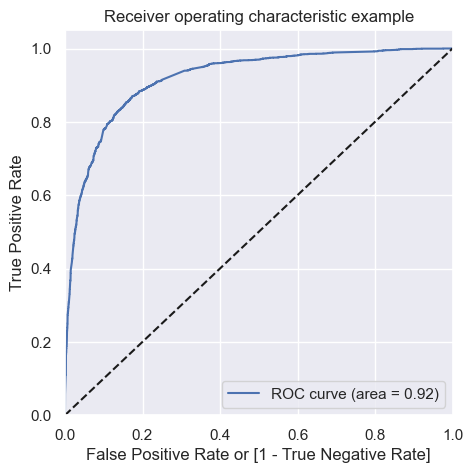

In [122]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Point

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,Converted_Prob,lead_number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.096729,609431,0,1,0,0,0,0,0,0,0,0,0
1,0,0.048190,631817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.006357,596164,0,1,0,0,0,0,0,0,0,0,0
3,0,0.057810,646570,0,1,0,0,0,0,0,0,0,0,0
4,0,0.003497,643974,0,1,0,0,0,0,0,0,0,0,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.722789  0.963098  0.574713
0.2   0.2  0.813389  0.912409  0.752374
0.3   0.3  0.841837  0.870641  0.824088
0.4   0.4  0.850959  0.822384  0.868566
0.5   0.5  0.847093  0.750608  0.906547
0.6   0.6  0.842610  0.706813  0.926287
0.7   0.7  0.828541  0.630576  0.950525
0.8   0.8  0.805659  0.541768  0.968266
0.9   0.9  0.753401  0.376723  0.985507


<Figure size 2000x1500 with 0 Axes>

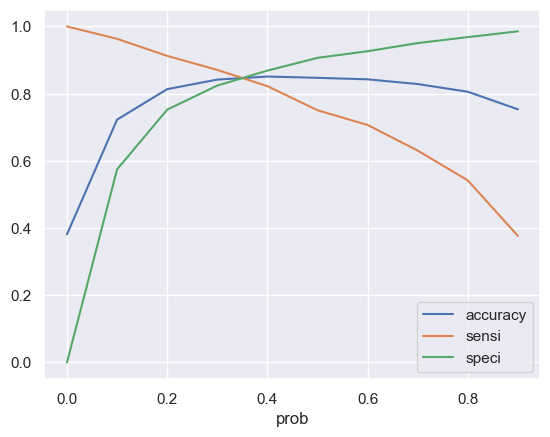

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

- Taking value 0.38 as the Final Cutoff

In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,converted,Converted_Prob,lead_number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.096729,609431,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.048190,631817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006357,596164,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.057810,646570,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.003497,643974,0,1,0,0,0,0,0,0,0,0,0,0


In [127]:
# Printing the Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.8495670995670995, Sensitivity 0.8313057583130575, specifitiy 0.8608195902048975  


In [128]:
confusion = confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Converted_pred )
confusion

array([[3628,  374],
       [ 615, 1851]], dtype=int64)

In [129]:
# Finding the Precision Score
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7863444572305331

In [130]:
# Finding the Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8313057583130575

In [131]:
# Finding the Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8313057583130575

In [132]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.Converted_Prob)

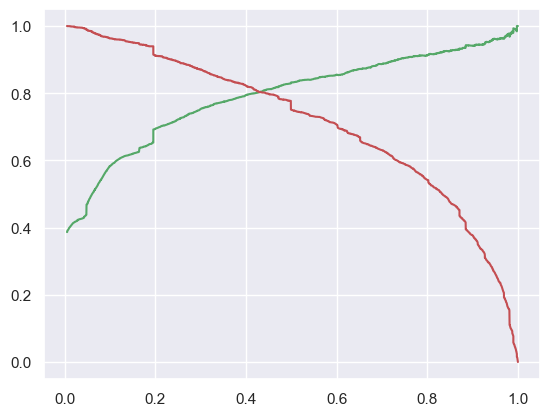

In [133]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')

plt.show()

# Step 7 - Making Predictions on the Test Set

# Scaling the test data set

In [134]:
X_test[['total_time_spent_on_website','page_views_per_visit','totalvisits']]=scaler.transform(X_test[['total_time_spent_on_website','page_views_per_visit','totalvisits']])

In [135]:
#Adding constant
X_tesm_sm = sm.add_constant(X_test[cols])

#Making Predictions
y_test_predict = res.predict(X_tesm_sm)

#Results
y_test_predict[:10]

lead_number
639211    0.987386
590711    0.965436
644174    0.790942
641392    0.293996
587955    0.699289
593130    0.005654
648319    0.048190
636722    0.990480
648231    0.959344
637858    0.012286
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_predict)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['lead_number'] = y_test_df.index
y_test_df.head()

,converted,lead_number
lead_number,,
639211,1,639211
590711,1,590711
644174,1,644174
641392,0,641392
587955,1,587955


In [137]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head()

,converted,lead_number
0,1,639211
1,1,590711
2,1,644174
3,0,641392
4,1,587955


In [138]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,converted,lead_number,Converted_Prob
0,1,639211,0.987386
1,1,590711,0.965436
2,1,644174,0.790942
3,0,641392,0.293996
4,1,587955,0.699289


In [139]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,converted,lead_number,Converted_Prob,final_test_predicted
0,1,639211,0.987386,1
1,1,590711,0.965436,1
2,1,644174,0.790942,1
3,0,641392,0.293996,0
4,1,587955,0.699289,1


In [140]:
confusion = confusion_matrix(y_pred_final.converted,y_pred_final.final_test_predicted)
confusion

array([[1434,  243],
       [ 175,  920]], dtype=int64)

In [141]:
acc,sensi,speci=metrices_(y_pred_final.converted,y_pred_final.final_test_predicted)

In [142]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.8492063492063492, Sensitivity 0.8401826484018264, specitiy 0.855098389982111  


- We can see that our model is doing well in test set also
- Sensitivity means how our model is telling that actually converted and model prdecited them as as converted.
- We can see that our model is giving about .84 sensitivity.
- it means that 84 percent time our model is able to predict (actually)converted as (prdicited)converted.

# Assigning Lead Scores

In [143]:
# making new df with lead score

lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['lead_number','Converted_Prob']]
df2=y_pred_final[["lead_number",'Converted_Prob']]

In [144]:
df1.head()

,lead_number,Converted_Prob
0,609431,0.096729
1,631817,0.048190
2,596164,0.006357
3,646570,0.057810
4,643974,0.003497


In [145]:
df2.head()

,lead_number,Converted_Prob
0,639211,0.987386
1,590711,0.965436
2,644174,0.790942
3,641392,0.293996
4,587955,0.699289


In [146]:
lead_scorer_df=df1.append(df2,ignore_index=True)
lead_scorer_df.head()

,lead_number,Converted_Prob
0,609431,0.096729
1,631817,0.048190
2,596164,0.006357
3,646570,0.057810
4,643974,0.003497


In [147]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))
lead_scorer_df.head()

,lead_number,Converted_Prob,Lead Score
0,609431,0.096729,9.67
1,631817,0.048190,4.82
2,596164,0.006357,0.64
3,646570,0.057810,5.78
4,643974,0.003497,0.35


In [148]:
# dropping Converted_Prob
lead_scorer_df.drop('Converted_Prob',1,inplace=True)

In [149]:
lead_scorer_df.head(20)

,lead_number,Lead Score
0,609431,9.67
1,631817,4.82
2,596164,0.64
3,646570,5.78
4,643974,0.35
5,614268,5.46
6,633399,9.57
7,615080,33.21
8,627916,4.82
9,622276,82.65


- Got the Lead score with respective lead Numbers.

**Inference :**

**After running the model these are the figures we obtain:**

**Train Data**
Accuracy: 0.8495670995670995, Sensitivity 0.8313057583130575, Specifitiy 0.8608195902048975

**Test Data**
Accuracy: 0.8492063492063492, Sensitivity 0.8401826484018264, Specitiy 0.855098389982111

**Conclusion:**

- Accuracy, Sensitivity and Specificity values of both train and test sets are around 85 percent
- Hence overall this model seems to be very good


- We have noted that the variables that important the most in the potential buyers are:
  * The total time spend on the Website.
  * When the lead origin is Lead add Form
  * When the lead source is Olark Chat
  * When the lead activity is Email Opened
  * When the last notable activity is SMS sent